In [40]:
import numpy as np
import pandas as pd
import math
import matplotlib.pyplot as plt

class Planet:
    def __init__(self, radius, year_length):
        self.radius = radius
        self.year_length = year_length
        
    def position(self, day):
        '''Returns position of the planet of the specific day'''
        angle = (2 * math.pi * day) / self.year_length
        # Calculating x, y length using trigonometry:
        x = round(self.radius * math.cos(angle), 2)
        y = round(self.radius * math.sin(angle), 2)
        return x, y

def distance(planet_a, planet_b, day):
    x1, y1 = planet_a.position(day)
    x2, y2 = planet_b.position(day)
    return math.sqrt((x2 - x1) ** 2 + (y2 - y1) ** 2)    #Eucledean distance calculation

# initialize planet objects
mercury = Planet(3.5, 88)
venus = Planet(6.7, 225)
earth = Planet(9.3, 365)
mars = Planet(14.2, 687)
jupiter = Planet(48.4, 4333)
saturn = Planet(88.9, 10759)
uranus = Planet(179, 30687)
neptune = Planet(288, 60190)

# First Part
print(distance(earth, mars, 732))

# Second Part
days = range(1000)
s = 1  # Noise standard deviation (initial value)

# Exact distances calculation as time series stored in list
earth_to_mercury = [distance(earth, mercury, day) for day in days]
earth_to_venus = [distance(earth, venus, day) for day in days]
earth_to_mars = [distance(earth, mars, day) for day in days]

# Noisy distances calculation with zero-mean normal distribution with s = 1
# as time series stored in list
noisy_earth_mercury = [distance(earth, mercury, day) + np.random.normal(0, s) for day in days]
noisy_earth_venus = [distance(earth, venus, day) + np.random.normal(0, s) for day in days]
noisy_earth_mars = [distance(earth, mars, day) + np.random.normal(0, s) for day in days]

# Compute average of exact distances
avg_earth_to_mercury = sum(earth_to_mercury) / 1000
avg_earth_to_venus = sum(earth_to_venus) / 1000
avg_earth_to_mars = sum(earth_to_mars) / 1000

# Compute average of noisy distances
avg_noisy_earth_mercury = sum(noisy_earth_mercury) / 1000
avg_noisy_earth_venus = sum(noisy_earth_venus) / 1000
avg_noisy_earth_mars = sum(noisy_earth_mars) / 1000

# Plot for noise-less cases
plt.figure(figsize=(13, 6))
plt.plot(days, earth_to_mercury, label='Earth to Mercury', alpha=0.5, color='orange')
plt.plot(days, earth_to_venus, label='Earth to Venus', alpha=0.5, color='blue')
plt.plot(days, earth_to_mars, label='Earth to Mars', alpha=0.5, color='red')
plt.axhline(y=avg_earth_to_mercury, color='orange', linestyle='--', label='Avg Earth to Mercury')
plt.axhline(y=avg_earth_to_venus, color='blue', linestyle='--', label='Avg Earth to Venus')
plt.axhline(y=avg_earth_to_mars, color='red', linestyle='--', label='Avg Earth to Mars')
plt.xlabel('Days')
plt.ylabel('Distance (CM)')
plt.title('Exact Distances over 1000 Days')
plt.legend()
plt.grid(True)
plt.show()

# Plot for noisy cases
plt.figure(figsize=(13, 6))
plt.plot(days, noisy_earth_mercury, label='Earth to Mercury', alpha=0.5, color='orange')
plt.plot(days, noisy_earth_venus, label='Earth to Venus', alpha=0.5, color='blue')
plt.plot(days, noisy_earth_mars, label='Earth to Mars', alpha=0.5, color='red')
plt.axhline(y=avg_noisy_earth_mercury, color='orange', linestyle='--', label='Avg Earth to Mercury')
plt.axhline(y=avg_noisy_earth_venus, color='blue', linestyle='--', label='Avg Earth to Venus')
plt.axhline(y=avg_noisy_earth_mars, color='red', linestyle='--', label='Avg Earth to Mars')
plt.xlabel('Days')
plt.ylabel('Distance (CM)')
plt.title('Noisy Distances over 1000 Days')
plt.legend()
plt.grid(True)
plt.show()

# mercury.position(440)


SyntaxError: invalid syntax (211391271.py, line 62)

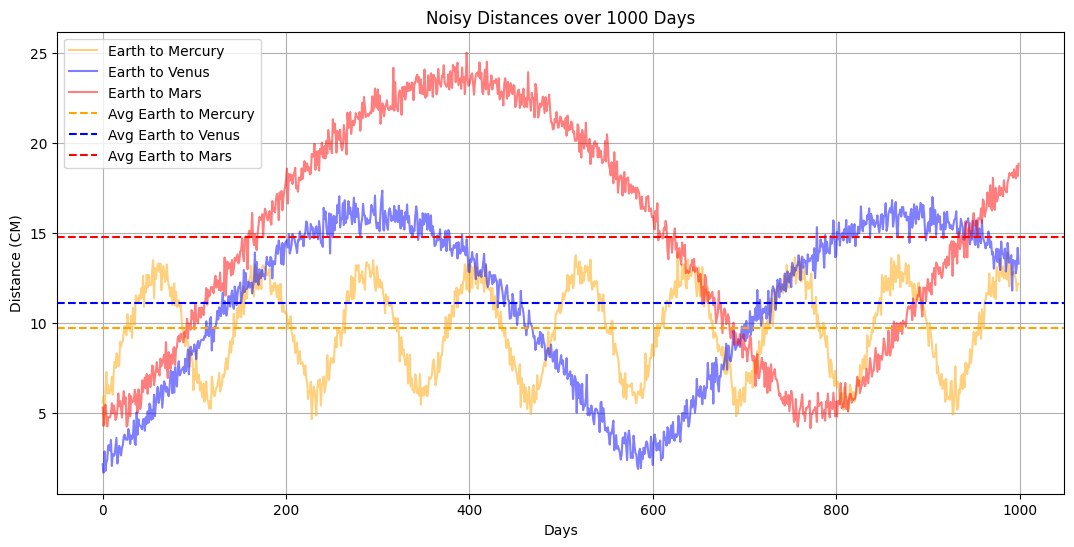

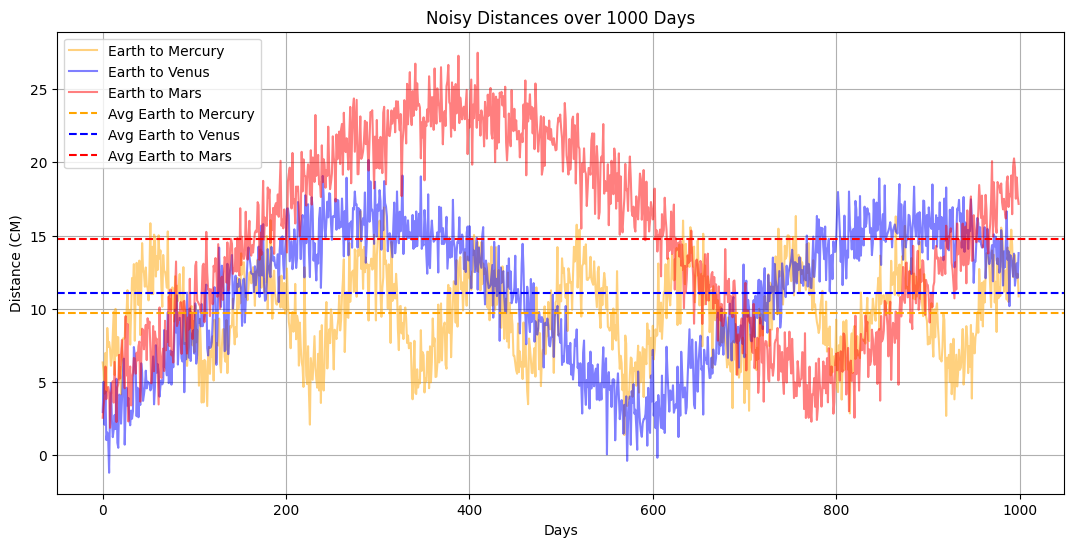

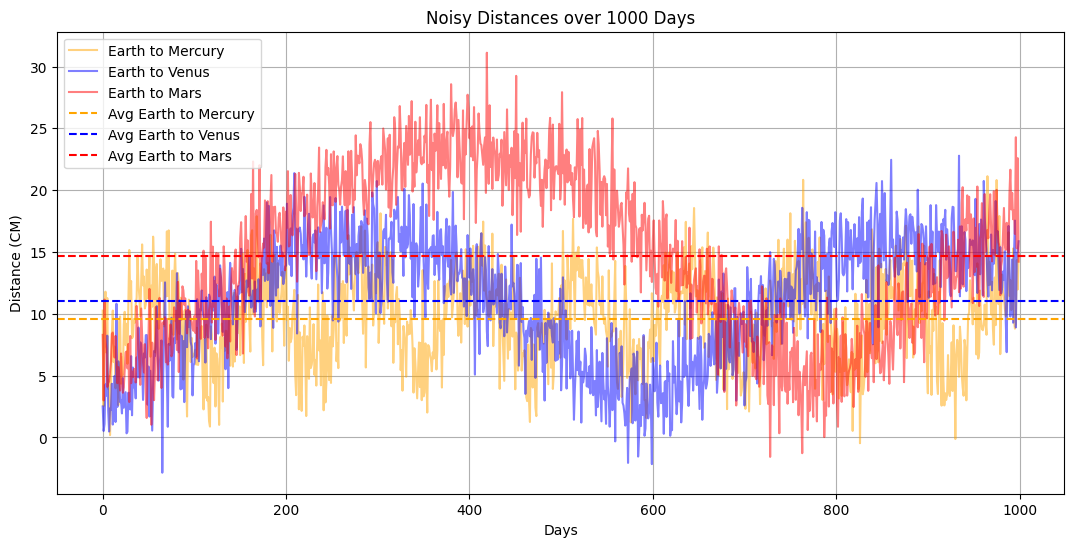

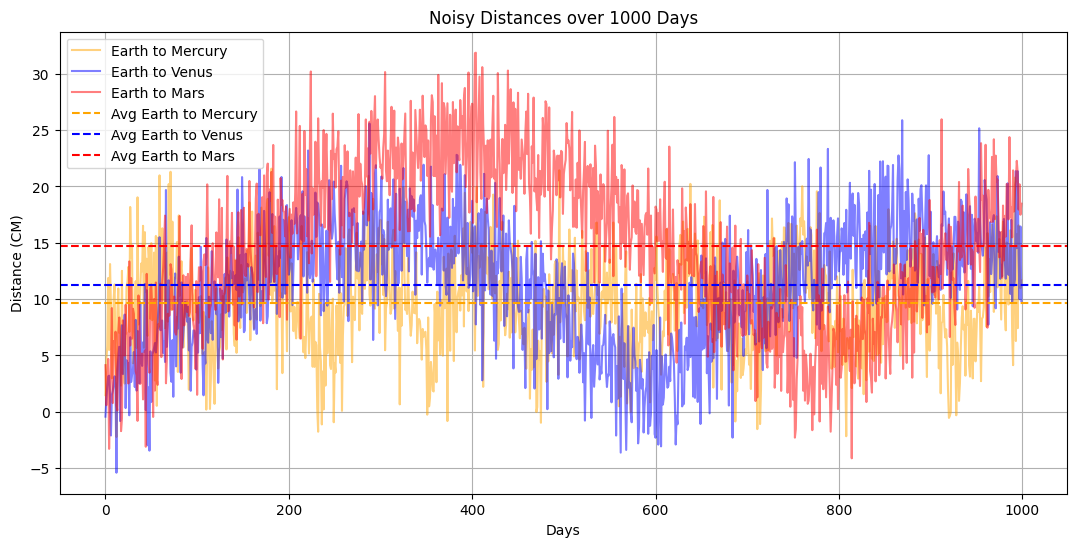

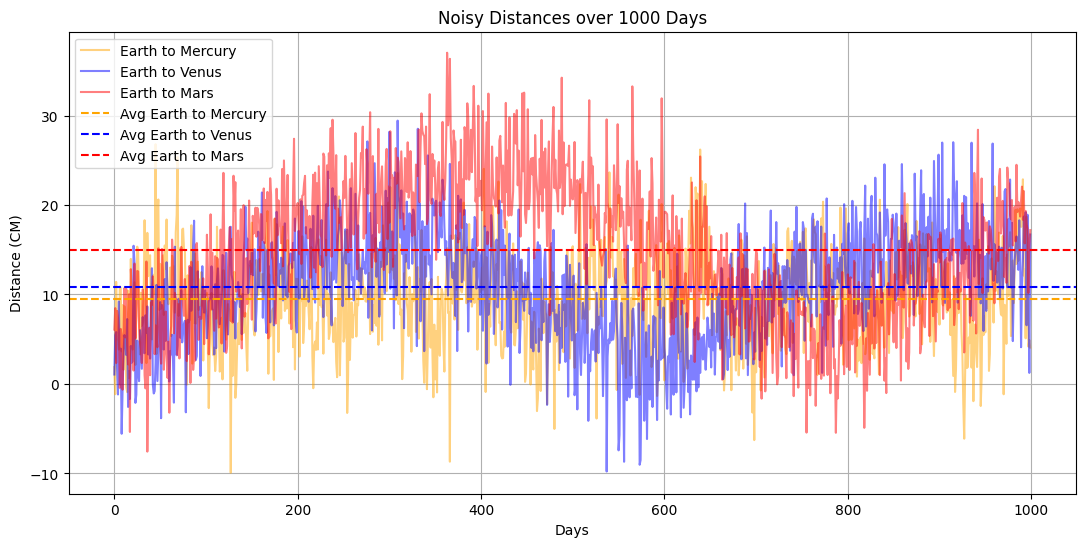

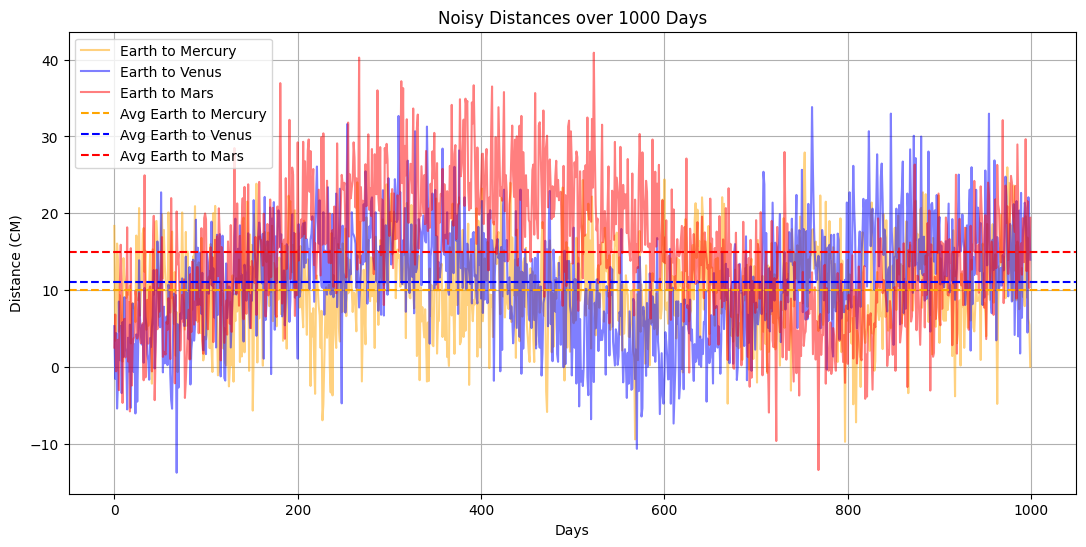

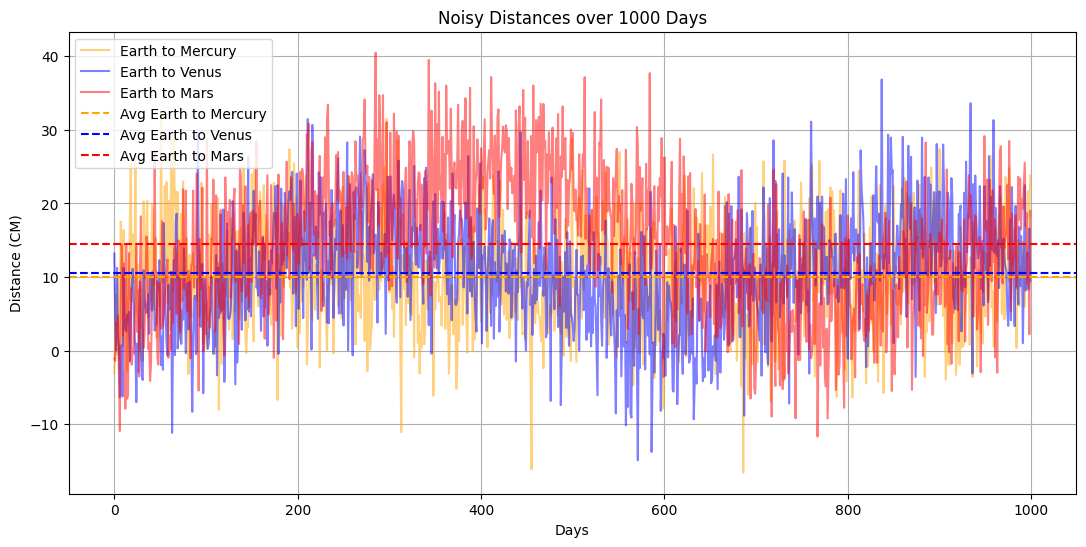

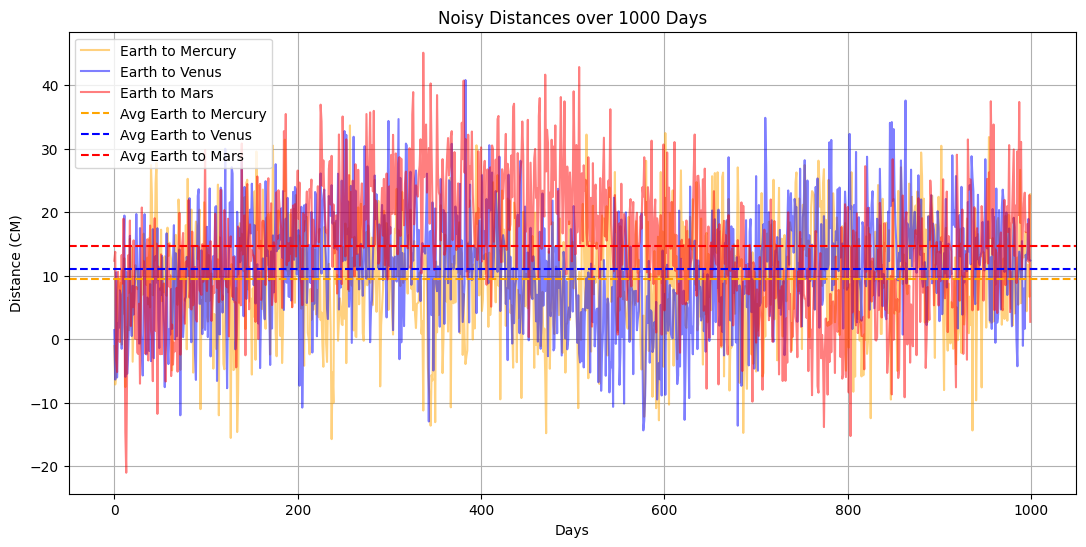

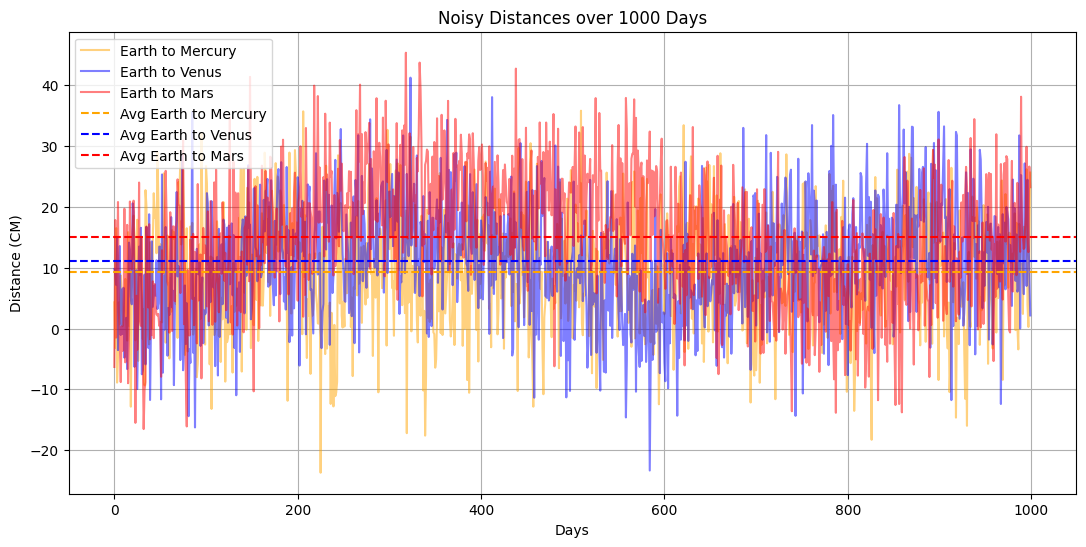

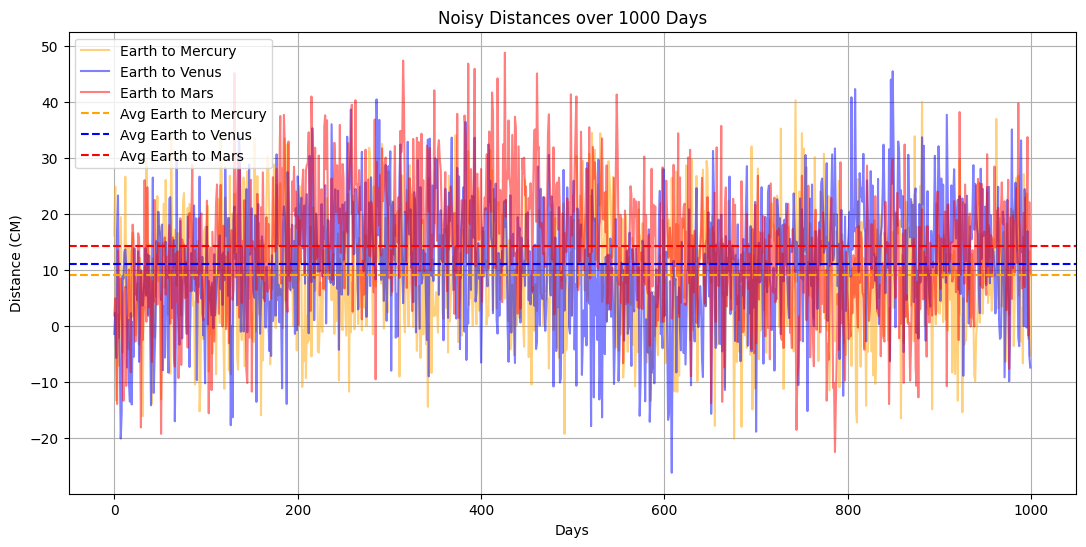

In [38]:
for s in np.linspace(0.5, 10, num=10):
    noisy_earth_mercury = [distance(earth, mercury, day) + np.random.normal(0, s) for day in days]
    noisy_earth_venus = [distance(earth, venus, day) + np.random.normal(0, s) for day in days]
    noisy_earth_mars = [distance(earth, mars, day) + np.random.normal(0, s) for day in days]

    avg_noisy_earth_mercury = sum(noisy_earth_mercury) / 1000
    avg_noisy_earth_venus = sum(noisy_earth_venus) / 1000
    avg_noisy_earth_mars = sum(noisy_earth_mars) / 1000

    plt.figure(figsize=(13, 6))
    plt.plot(days, noisy_earth_mercury, label='Earth to Mercury', alpha=0.5, color='orange')
    plt.plot(days, noisy_earth_venus, label='Earth to Venus', alpha=0.5, color='blue')
    plt.plot(days, noisy_earth_mars, label='Earth to Mars', alpha=0.5, color='red')
    plt.axhline(y=avg_noisy_earth_mercury, color='orange', linestyle='--', label='Avg Earth to Mercury')
    plt.axhline(y=avg_noisy_earth_venus, color='blue', linestyle='--', label='Avg Earth to Venus')
    plt.axhline(y=avg_noisy_earth_mars, color='red', linestyle='--', label='Avg Earth to Mars')
    plt.xlabel('Days')
    plt.ylabel('Distance (CM)')
    plt.title('Noisy Distances over 1000 Days')
    plt.legend()
    plt.grid(True)
    plt.show()

In [ ]:
# ### Part 3: 1000-Year Simulation
num_days = 1000 * 365  # Assuming 1000 Earth years
planet_list = list(planets.values())
num_planets = len(planet_list)
sum_distances = [[0.0 for _ in range(num_planets)] for _ in range(num_planets)]

# Compute sum of distances
for day in range(num_days):
    for i in range(num_planets):
        for j in range(i + 1, num_planets):  # Only upper triangle
            dist = distance(planet_list[i], planet_list[j], day)
            sum_distances[i][j] += dist
            sum_distances[j][i] += dist  # Symmetry

# Compute average distances
average_distances = [[sum_distances[i][j] / num_days for j in range(num_planets)] for i in range(num_planets)]